# Code for Webscrapping data from Booking.com

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec  2 13:33:25 2022

@author: JaykantMENDAPRA
"""
#####################################
#   Importing required libraries    #
#####################################

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver import ActionChains

from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd


######################################################
#   Using driver to open url and open booking.com    #
######################################################

driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://www.booking.com/"

driver = webdriver.Chrome('C:/Users/jmjay/M2S1/Session - Web scrapping/chromedriver_win32/chromedriver')
driver.get(url)
time.sleep(3)


####################################################################################
#   Find the search box to enter city name - change city name as per requirement   #
####################################################################################

element = driver.find_element(By.CSS_SELECTOR,'#ss')
city_name = "paris"
element.send_keys(city_name)

##################################
#   Selecting consent option     #
##################################

ActionChains(driver).click(driver.find_element(By.ID,'onetrust-accept-btn-handler')).perform()


##############################################
#   Selecting check-in and check-out date    #
##############################################
ActionChains(driver).click(driver.find_element(By.CSS_SELECTOR,'#frm > div.xp__fieldset.js--sb-fieldset.accommodation > div.xp__dates.xp__group > div.xp__dates-inner > div:nth-child(2) > div > div > div > div > span')).perform()
ActionChains(driver).click(driver.find_element(By.CSS_SELECTOR,'#frm > div.xp__fieldset.js--sb-fieldset.accommodation > div.xp__dates.xp__group > div.xp-calendar > div > div > div.bui-calendar__content > div:nth-child(1) > table > tbody > tr:nth-child(1) > td.bui-calendar__date.bui-calendar__date--today')).perform()

#   Clicking on search button    #
ActionChains(driver).click(driver.find_element(By.CSS_SELECTOR,'#frm > div.xp__fieldset.js--sb-fieldset.accommodation > div.xp__button > div.sb-searchbox-submit-col.-submit-button > button > span.js-sb-submit-text')).perform()
time.sleep(2)


###########################################################################
#    Creating lists to add information regarding available properties     #
###########################################################################

property_name = []
preferred_plus_property = []
property_stars = []
property_address = []
dist_from_center = []
metro_access = []
booking_reviews = []
user_reviews = []
room_type = []
bed_type = []
sus_property_type = []
property_rating = []
price_per_night = []
breakfast_included = []
free_cancellation_no_prepayment = []


content = driver.page_source        #download and interpret the html code
soup = BeautifulSoup(content) 

# Getting total number of pages for the available properties
total_pages = int(soup.findAll('button',attrs={"class":"fc63351294 f9c5690c58"})[-1].get_text())

##########################################################
#    Iterating through each page to extract the data     #
##########################################################

for x in range(total_pages):
    content = driver.page_source        #download and interpret the html code
    soup = BeautifulSoup(content)       #give the parsed code to beautifulsoup
    
    #Listing all the properties
    props = soup.findAll("div",attrs = {"class":"a826ba81c4 fe821aea6c fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"})

    #### Iterating through each property on the page to extract the data
    for x in range(len(props)):
        ##### Extracting Property name
        property_name.append(props[x].findAll("div",attrs = {"class":"fcab3ed991 a23c043802"})[0].get_text())
        
        
        ##### Extracting if the property is preferred parter/plus Property
        ## 0 - Not a preferred partner property
        ## 1 - Preferred partner property
        ## 2 - preferred partner Plus property
        if len(props[x].findAll("span",attrs={"data-testid":"preferred-badge"}))==1:
            preferred_plus_property.append(1)
        else: preferred_plus_property.append(0)
        
        
        ##### Extracting #stars for the property
        if(len(props[x].findAll("span",attrs={"class":"b6dc9a9e69 adc357e4f1 fe621d6382"})))!=0:
            property_stars.append(len(props[x].findAll("span",attrs={"class":"b6dc9a9e69 adc357e4f1 fe621d6382"})))
        else: property_stars.append("No Rating available")
        
        
        ##### Extracting address of the property
        property_address.append(props[x].findAll("span",attrs={"class":"f4bd0794db b4273d69aa"})[0].get_text())
        
        
        ##### Extracting the distance from cente
        #if len(props[x].findAll("span",attrs={"class":"f4bd0794db"})[-2].get_text().split(" ")[0]) == 4:    
        dist_from_center.append(float(props[x].findAll("span",attrs={"data-testid":"distance"})[0].get_text().split(" ")[0]))
        
        
        ##### Checkig for metro access
        if props[x].findAll("span",attrs={"class":"cb5ebe3ffb"})[-1].get_text() == 'Metro access':
            metro_access.append(1)
        else: metro_access.append(0)
        
        
        ##### Checkig for reviews
        booking_reviews.append(props[x].findAll("div",attrs={"class":"b5cd09854e f0d4d6a2f5 e46e88563a"})[0].get_text())
        user_reviews.append(props[x].findAll("div",attrs={"class":"d8eab2cf7f c90c0a70d3 db63693c62"})[0].get_text().split(" ")[0])
        
        
        ##### Checkig for room and bed type
        room_type.append(props[x].findAll("span",attrs={"class":"df597226dd"})[0].get_text())
        bed_type.append(props[x].findAll("div",attrs={"class":"cb5b4b68a4"})[0].get_text())
        
        
        ##### Checkig if the property is a travel sustainable property
        if len(props[x].findAll("span",attrs={"class":"a51f4b5adb"}))==1:
            if props[x].findAll("span",attrs={"class":"a51f4b5adb"})[0].get_text() == "Travel Sustainable property":
                sus_property_type.append(1)
            else: pass
        else:
            sus_property_type.append(0)
    
    
        ##### Checkig for property rating
        property_rating.append(float(props[x].findAll("div",attrs={"class":"b5cd09854e d10a6220b4"})[0].get_text()))
        
        
        ##### Checkig for metro access
        if props[x].findAll("div",attrs = {"class":"e6e585da68"})[-1].get_text().find("Original") == -1:
            price_per_night.append(int(props[x].findAll("div",attrs = {"class":"e6e585da68"})[-1].get_text().split(" ")[-1][2:].replace(",","")))
        else:price_per_night.append(int(props[x].findAll("div",attrs = {"class":"e6e585da68"})[-1].get_text().split(" ")[-1][2:-1].replace(",","")))

        ##### Checkig if breakfast is included
        if(len(props[x].findAll("span",attrs={"class":"e05969d63d"})) == 1):
            breakfast_included.append(True)
        else: breakfast_included.append(False)
        
        ##### Checkig if there is free cancellation iption or no prepayment
        if(len(props[x].findAll("div",attrs={"class":"d506630cf3"})) == 1):
            free_cancellation_no_prepayment.append(True)
        else: free_cancellation_no_prepayment.append(False)
        
    
    
    
    # Navigating to next page and waiting for 2 seconds for page to load
    ActionChains(driver).click(driver.find_element(By.CSS_SELECTOR,'#search_results_table > div:nth-child(2) > div > div > div > div.d7a0553560 > div.a826ba81c4.fa71cba65b.fa2f36ad22.afd256fc79.d08f526e0d.ed11e24d01.ef9845d4b3.b727170def > nav > div > div.f32a99c8d1.f78c3700d2 > button')).perform()
    time.sleep(2)

######################################################################
#   Creating a dictionary to store all the information extracted     #
#   creating a dataframe and extracting everything into excel file   #
######################################################################

prop_dict  = {
    "property_name" :           property_name,
    "preferred_plus_property" : preferred_plus_property,
    "property_stars" :           property_stars,
    "property_address" :        property_address,
    "dist_from_center" :        dist_from_center,
    "metro_access" :            metro_access,
    "booking_reviews" :         booking_reviews,
    "user_reviews" :            user_reviews,
    "room_type" :               room_type,
    "bed_type" :                bed_type,
    "sus_property_type" :       sus_property_type,
    "property_rating" :         property_rating,
    "price_per_night" :         price_per_night,
    "breakfast_included" :      breakfast_included,
    "free_cancellation_no_prepayment": free_cancellation_no_prepayment
              }

df = pd.DataFrame(prop_dict)
## df.to_excel(f"{city_name}_properties.xlsx",index = False)
## df.to_csv(f"{city_name}_properties.csv",index = False)

# EDA

#### Importing Libraries and loading data into dataframe

In [1]:
import pandas as pd
import numpy as np

#libraries to visualize the data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import matplotlib.colors as mcolors
import seaborn as sns
import plotly

In [2]:
df = pd.read_csv("paris_properties.csv")

In [3]:
#df.head(5)

In [4]:
#df.info()

#### Cleaning and converting property_star & user_reviews columns

In [5]:
df.loc[df.property_stars == "No Rating available",'property_stars'] = 0
df["property_stars"] = df["property_stars"].astype('int')
df["user_reviews"] = df["user_reviews"].str.replace(",","").astype('int')

#### 1. Total Unique Properties

In [6]:
print(f"number of unique properties available for rent :{df.property_name.nunique()}")

number of unique properties available for rent :976


#### 2. Properties in different location with stars

##### 2.A Number of properties per the number of star

<AxesSubplot:xlabel='property_stars'>

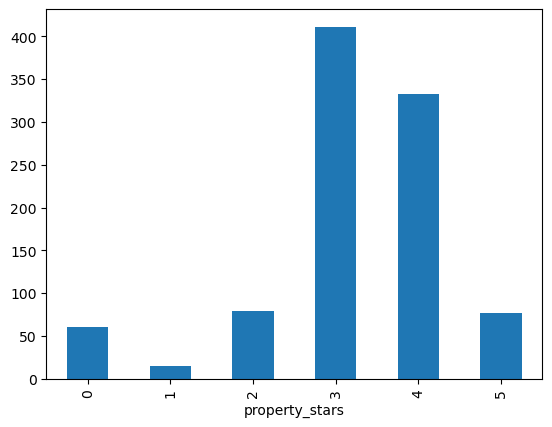

In [7]:
df.groupby("property_stars")["property_name"].nunique().plot.bar()

##### 2.B Number of properties per the number of star distributed across regions

<AxesSubplot:xlabel='property_address'>

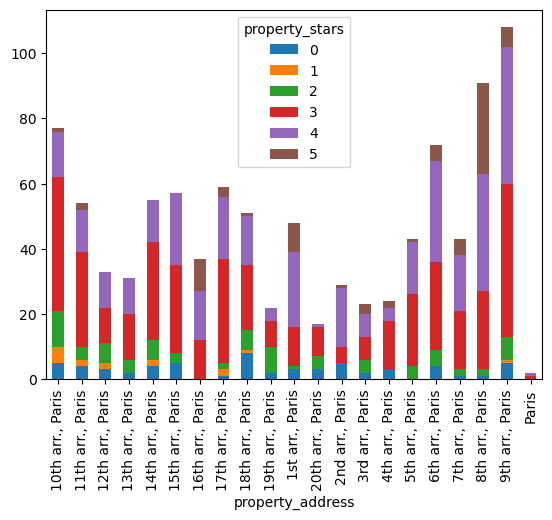

In [8]:
df.groupby(['property_address',"property_stars"])["property_name"].nunique().unstack(level=1).plot.bar(stacked=True)

##### 2.C Number of properties above 2stars distributed across the city

<AxesSubplot:ylabel='property_stars'>

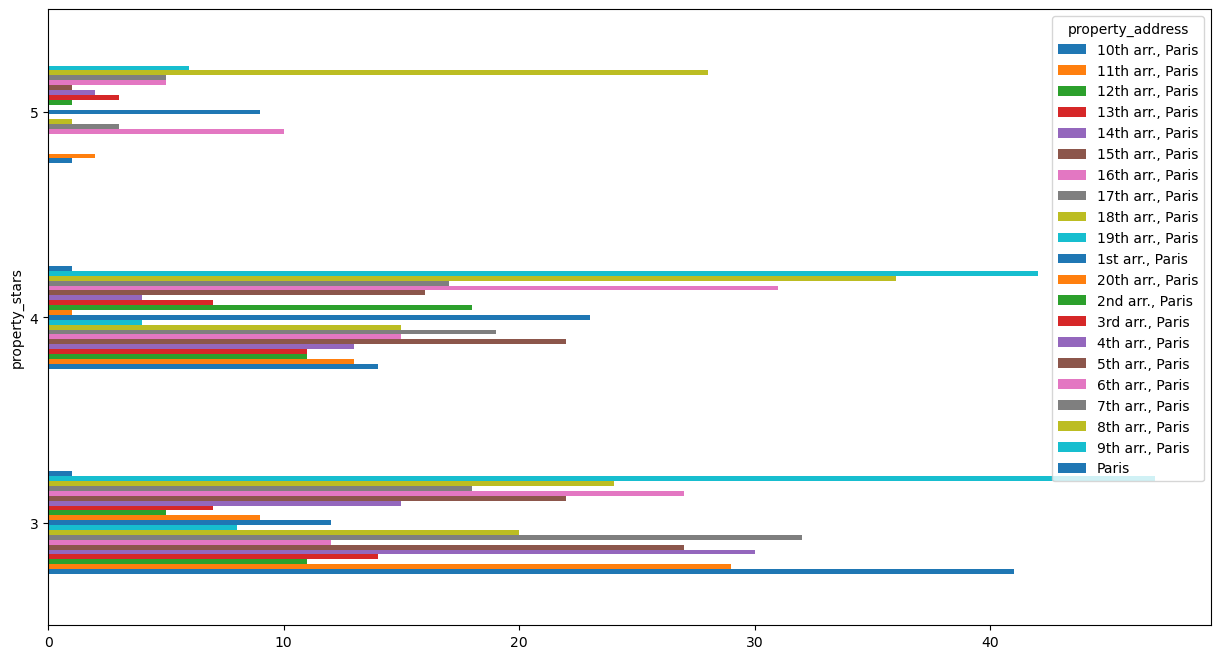

In [9]:
df[df["property_stars"] >=3].groupby(["property_address","property_stars"])["property_name"].nunique().unstack(level=0).plot.barh(figsize = (15,8))

#### 3. Properties with Metro access

In [10]:
df.groupby("metro_access")["property_name"].nunique()

metro_access
0    138
1    838
Name: property_name, dtype: int64

##### Out of 976 Property 138 are without metro Access.

#### 4. Properties within proximity

In [11]:
round(df.dist_from_center.mean(),2)

7.61

##### Most of the properties are within average of 7.6 KM

#### 5. Properties as per the review by Booking.com

In [12]:
pd.DataFrame(df.booking_reviews.value_counts())

,booking_reviews
Very good,373
Good,287
Fabulous,180
Review score,91
Superb,64
Exceptional,3
0,2


 #### 6. Top 10 Properties by most user reviews

In [13]:
pd.DataFrame(df.sort_values(by = "user_reviews")[:10])

,property_name,preferred_plus_property,property_stars,property_address,dist_from_center,metro_access,booking_reviews,user_reviews,room_type,bed_type,sus_property_type,property_rating,price_per_night,breakfast_included,free_cancellation_no_prepayment
980,Apartments WS Tour Eiffel - Laos,0,3,"15th arr., Paris",3.8,0,Review score,2,One-Bedroom Apartment,Entire apartment • 1 bedroom • 1 bathroom • 1 ...,1,5.0,163,False,False
990,Modern studio fully Renovated,0,0,"16th arr., Paris",4.6,1,Good,3,Studio,Entire studio • 1 kitchen • 20m²1 double bed,0,7.3,88,False,False
878,SO Paris Hotel,1,5,"4th arr., Paris",1.1,1,Superb,33,Capsule with King Bed or twin Bed and Courtyar...,Multiple bed types,1,9.2,478,False,False
853,Baba Hotel,0,0,"18th arr., Paris",4.3,1,Very good,34,Superior Double Room,1 large double bed,0,8.0,110,False,False
598,Hôtel Central Bastille,0,0,"11th arr., Paris",1.5,1,Review score,42,Double Room,1 double bed,0,5.5,118,False,False
887,Hôtel Alléty,0,1,"10th arr., Paris",1.5,1,Review score,46,Comfort Double Room,1 large double bed,0,4.9,105,False,False
574,Ibis Styles Paris Batignolles,0,3,"17th arr., Paris",4.3,1,Good,62,Standard Twin Room,NaN,1,7.9,129,True,False
303,Best Western Plus Hôtel Mercedes,1,4,"17th arr., Paris",4.7,1,Good,74,Classic Queen Room with Queen Bed,1 large double bed,1,7.7,115,False,False
602,Hôtel Le Relais Saint-Germain,0,4,"6th arr., Paris",1.1,1,Fabulous,78,Deluxe Double Room,"2 beds (1 extra-large double, 1 sofa bed)",0,8.7,256,True,False
979,"Maison Astor Paris, Curio Collection by Hilton",1,4,"8th arr., Paris",3.0,1,Very good,129,Classic Room,1 double bed,1,8.1,325,False,False


#### 7. Travel Sustainable Property

In [36]:
pd.DataFrame({"Travel Sustainable Property":["No","Yes"],"Number of properties":df.sus_property_type.value_counts()})

,Travel Sustainable Property,Number of properties
0,No,618
1,Yes,382


#### 8. Properties with Breakfast Included

In [15]:
pd.DataFrame({"Breakfast Included":["No","Yes"],"Number of properties":df.breakfast_included.value_counts()})

,Breakfast Included,Number of properties
False,No,963
True,Yes,37


#### 9. Properties with Free Cancellation

In [16]:
pd.DataFrame({"Free Cancellation":["No","Yes"],"Number of properties":df.free_cancellation_no_prepayment.value_counts()})

,Free Cancellation,Number of properties
False,No,989
True,Yes,11


#### 10. Properties with rating more than 9.2

In [17]:
df[df.property_rating >= 9.2]

,property_name,preferred_plus_property,property_stars,property_address,dist_from_center,metro_access,booking_reviews,user_reviews,room_type,bed_type,sus_property_type,property_rating,price_per_night,breakfast_included,free_cancellation_no_prepayment
444,Hôtel Le Relais des Halles,1,4,"1st arr., Paris",0.7,1,Superb,975,Double Room,Beds: 1 double or 2 singles,0,9.2,239,False,False
478,Hôtel Saint-Marc,1,4,"2nd arr., Paris",1.9,1,Superb,500,Superior Room - Swimming Pool / Hammam Access ...,1 large double bed,0,9.2,299,False,False
578,Millésime Hôtel,1,4,"6th arr., Paris",1.2,1,Superb,557,Classic Double Room,1 double bed,1,9.2,311,False,False
595,Hotel Saint-Louis en L'Isle,1,3,"4th arr., Paris",0.5,1,Superb,345,Superior Double or Twin Room,Beds: 1 double or 2 singles,0,9.2,204,False,False
609,Hôtel Le Ballu,1,4,"9th arr., Paris",3.3,1,Superb,489,Superior Double Room,1 extra-large double bed,0,9.2,246,False,False
671,Hôtel des Arts Montmartre,1,4,"18th arr., Paris",3.5,1,Exceptional,2140,Standard Double Room,1 double bed,0,9.5,196,False,False
681,Hôtel D'Aubusson,1,5,"6th arr., Paris",0.9,1,Superb,738,Superior Double Room,1 large double bed,1,9.2,462,False,False
878,SO Paris Hotel,1,5,"4th arr., Paris",1.1,1,Superb,33,Capsule with King Bed or twin Bed and Courtyar...,Multiple bed types,1,9.2,478,False,False


#### 11. Top 5 regions with cheapest one night stay

In [18]:
pd.DataFrame(df.groupby("property_address")["price_per_night"].mean().sort_values(ascending=True)[0:5])

,price_per_night
property_address,
Paris,85.000000
"19th arr., Paris",113.300000
"20th arr., Paris",116.076923
"18th arr., Paris",122.137255
"13th arr., Paris",127.312500


#### 12. Top 5 properties with cheapest one night stay

In [19]:
pd.DataFrame(df[["property_name","price_per_night"]].sort_values(by="price_per_night")[0:5])

,property_name,price_per_night
958,Ideal Hotel,57
945,Ideal Hotel,57
75,Angleterre Hotel,62
406,Hôtel Aladin,64
784,Hotel du Globe 18,65


#### 13. How Price per night varies with regions of the city?

<Figure size 1000x500 with 0 Axes>

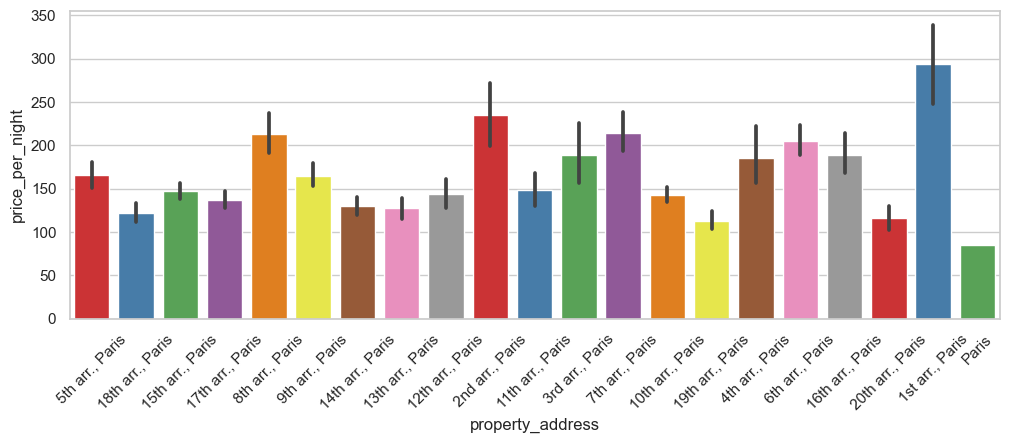

In [20]:
sns.set_theme(style="whitegrid")
dfsns = df.sort_values("property_address", ascending=False)

plt.figure(figsize=(10,5))

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 4))

sns.set_color_codes("pastel")
chart = sns.barplot(
    x=df["property_address"], 
    y=df["price_per_night"], 
    data=dfsns,label="Total", 
    palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.show()



#### Additional part for EDA - Generating correlation matrix

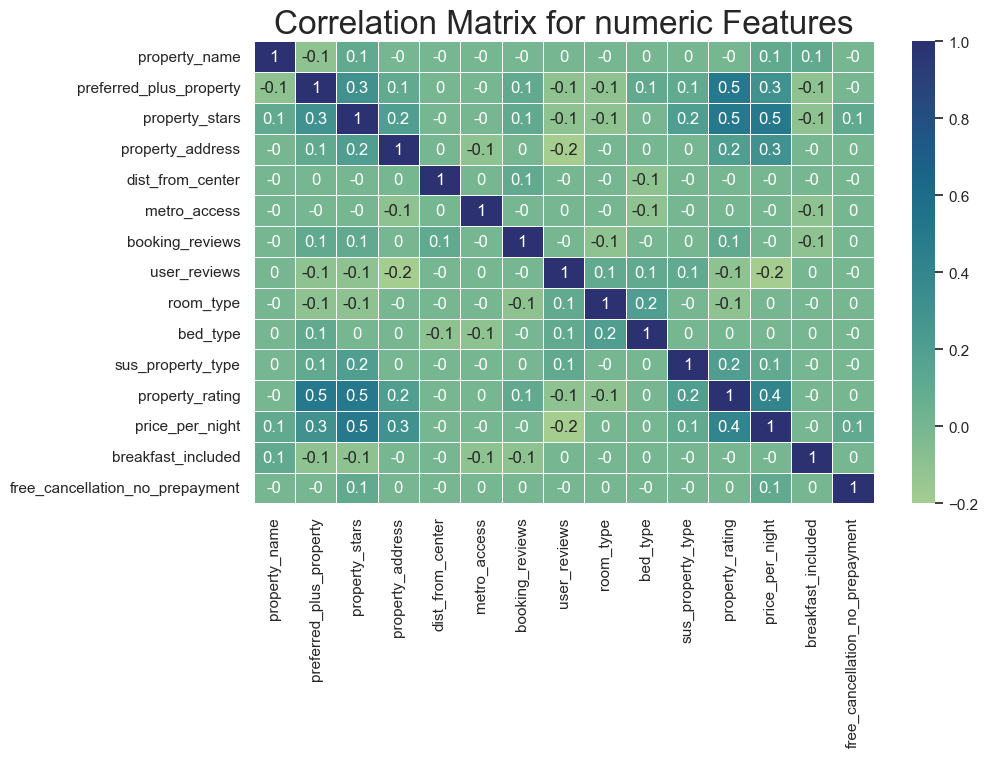

In [21]:
#changing to categorical variable and cat codes for numerical correlation
from turtle import color


df_numerized = round(df,2)
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes

#plotting the heatmap
correlation_matrix = round((df_numerized.corr(method = 'pearson')),1)
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlation_matrix, annot = True, linewidth = 0.5, ax= ax, cmap = "crest")
plt.title('Correlation Matrix for numeric Features', fontsize =24)
plt.show()

#### 14. How does the regression between price per night and property rating look like?

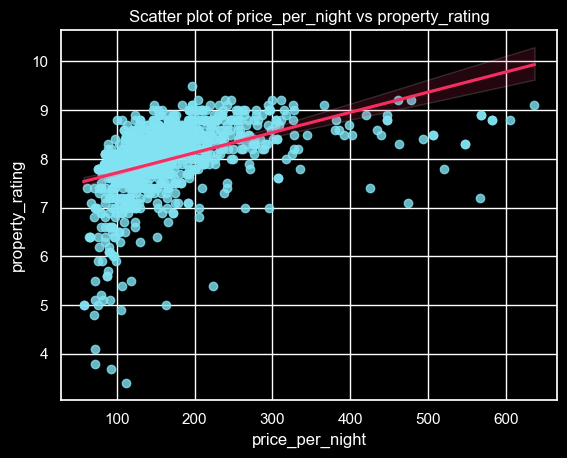

In [22]:
with plt.style.context('dark_background'):
  ax = sns.regplot(x= df.price_per_night,y=df.property_rating,data=df, scatter_kws= {"color": "#82E3F3"}, line_kws={"color":"#F42E61"} )
  
  ax.set_title('Scatter plot of price_per_night vs property_rating')

#### 15. How does the regression between property ratings and user review look like?

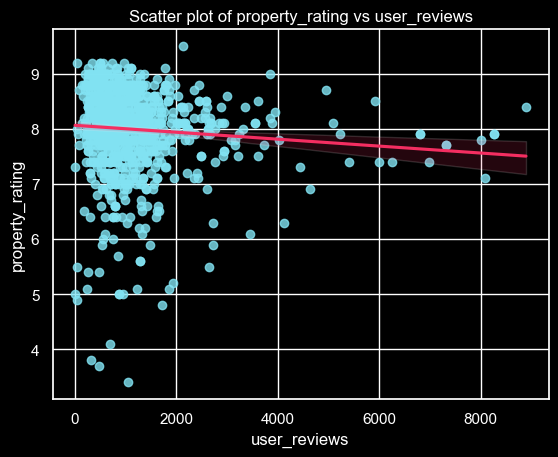

In [23]:
with plt.style.context('dark_background'):
  ax = sns.regplot(x= df.user_reviews,y=df.property_rating,data=df, scatter_kws= {"color": "#82E3F3"}, line_kws={"color":"#F42E61"} )
  
  ax.set_title('Scatter plot of property_rating vs user_reviews')

# Thank you